## Esame Metodi Numerici  12 Giugno 2024 - Turno II Ore 12,30

## Esercizio 1
Si condiderino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input.
                                      **punti 8**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **punti 3**


**Totale Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SolveTriangular import Lsolve, Usolve

In [2]:
from scipy.io import loadmat
import numpy as np

dati = loadmat('testII')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)

In [3]:
def mostra_caratteristiche(A):
    print("- dimensione:", A.shape)
    print("- densità:", np.count_nonzero(A)/np.prod(A.shape))
    print("- diagonale strettamente dominante:", np.all(2*np.abs(A)>np.sum(np.abs(A)))) # |Aii| > sum_j!=i|Aij| => 2*|Aii| > sum_j|Aij|
    print("- simmetrica:", np.all(A.T==A))
    print("- definita positiva:", np.all(np.linalg.eigvals(A) > 0))

print("Matrice A:", A)
mostra_caratteristiche(A)
print()
print("Matrice A1:", A1)
mostra_caratteristiche(A1)

# entrambe le matrici sono quadrate, grandi, sparse, simmetriche e definite positive. I metodi applicabili per la risoluzione di questi sistemi lineari sono quindi
# - Gauss-Seidel
# - Gauss-Seidel SOR
# - Metodo del gradiente (steepest descent)
# - Gradiente coniugato

Matrice A: [[ 0.67892647 -0.16404171  0.         ...  0.          0.
   0.        ]
 [-0.16404171  0.37419456  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.14103676 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.23259295  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.01171237
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.05548258]]
- dimensione: (500, 500)
- densità: 0.142856
- diagonale strettamente dominante: False
- simmetrica: True
- definita positiva: True

Matrice A1: [[ 1.98878556e-01  5.85206190e-08  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.85206190e-08  7.24204645e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.32344076e-01 ... -2.07334060e-02
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00 -2.07334060e-02 ...  6.77887423e-02
  

In [4]:
# implemento Gauss-Seidel SOR e Gradiente coniugato

def gauss_seidel_sor(A, b, x0, it_max, toll, omega):
    errore=1000
    d=np.diag(A) 
    D=np.diag(d)
    E=np.tril(A, -1) 
    F=np.triu(A, 1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    invMomega = np.linalg.inv(Momega)
    T=invMomega@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR:", raggiospettrale)

    
    M=D+E
    N=-F 
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<it_max and errore>toll:
        xtilde, flag=Lsolve(M, b+N@x0)
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
    # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b 
    p = -r 
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0.copy())
    vet_r=[]
    vet_r.append(errore)
    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while it < itmax and errore > tol: 
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap) 
        x = x + alpha*p
        vec_sol.append(x.copy())
        rtr_old=r.T@r
        r= r + alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma*p # direzione del gradiente coniugato lungo il piano formato da -r e p
    
    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x,vet_r,iterates_array,it

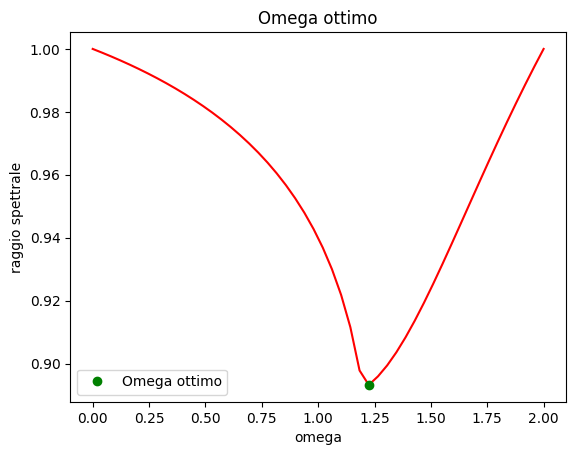

raggio spettrale Gauss-Seidel SOR: 0.8931923515876188


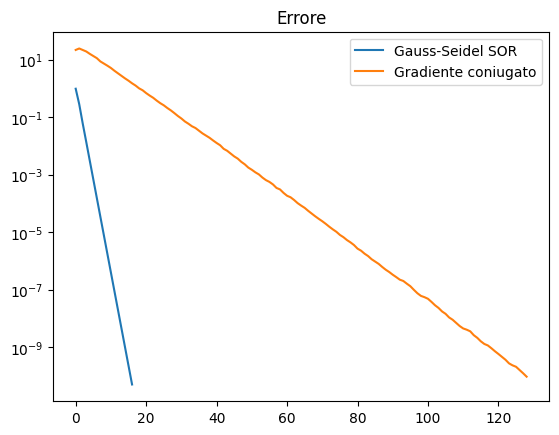

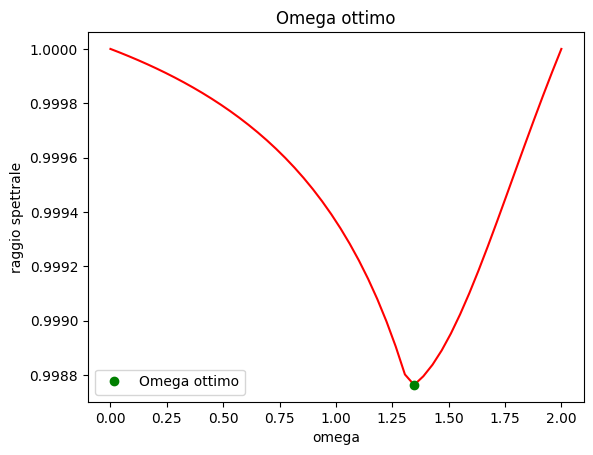

raggio spettrale Gauss-Seidel SOR: 0.9987631104795501


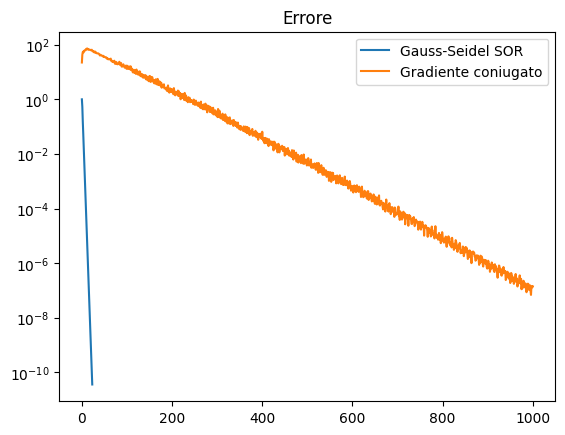

In [60]:
for A in [A, A1]:
    n = A.shape[0]
    itmax = 1000
    tol = 1e-10
    
    # ricerca omega ottimo
    # il valore ottimo per omega è quello che minimizza il raggio spettrale della matrice di iterazione
    raggi_spettrali = []
    candidati_omega = np.linspace(0, 2, 50)
    d=np.diag(A) 
    D=np.diag(d)
    E=np.tril(A, -1) 
    F=np.triu(A, 1)
    for omega in candidati_omega:
        Momega=D+omega*E
        Nomega=(1-omega)*D-omega*F
        invMomega = np.linalg.inv(Momega)
        T=invMomega@Nomega
        autovalori=np.linalg.eigvals(T)
        raggiospettrale=np.max(np.abs(autovalori))
        raggi_spettrali.append(raggiospettrale)
    
    indice_min = np.argmin(raggi_spettrali)
    omega = candidati_omega[indice_min]
    
    plt.title("Omega ottimo")
    plt.xlabel("omega")
    plt.ylabel("raggio spettrale")
    plt.plot(candidati_omega, raggi_spettrali, "r")
    plt.plot(omega, raggi_spettrali[indice_min], "go", label="Omega ottimo")
    plt.legend()
    plt.show()
    
    x0 = np.zeros((n, 1))
    x_gs, it_gs, err_gs = gauss_seidel_sor(A, b, x0, itmax, tol, omega)
    x_cg, err_cg, _, it_cg = conjugate_gradient(A, b, x0, itmax, tol)
    
    plt.title("Errore")
    plt.yscale("log")
    plt.plot(range(it_gs), err_gs, label="Gauss-Seidel SOR")
    plt.plot(range(it_cg+1), err_cg, label="Gradiente coniugato")
    plt.legend()
    plt.show()
    
    # Gauss-Seidel SOR è molto più veloce rispetto al gradiente coniugato ad arrivare alla soluzione

# Esercizio 2

-  Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  

-  Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo.  Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine.
   **[punti: 2]**

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

  **Totale punti 14**



In [6]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

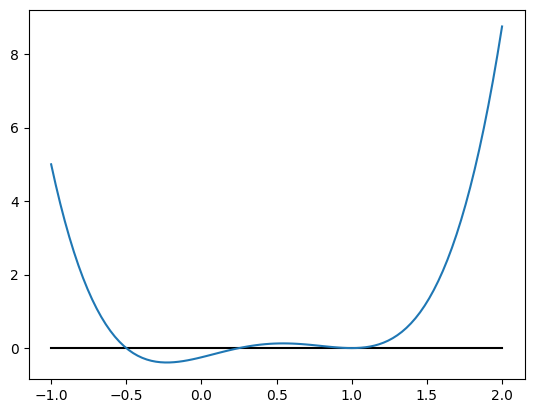

In [7]:
xs = sym.symbols("x")
fs = 2*xs**4 -(7/2)*xs**3 +(3/4)*xs**2 +xs -1/4
dfs = sym.diff(fs, xs, 1) # derivata prima

f = sym.lambdify(xs, fs, np)
df = sym.lambdify(xs, dfs, np)

x = np.linspace(-1, 2, 100)
plt.plot(x, np.zeros_like(x), "black")
plt.plot(x, f(x))
plt.show() # la funzione si annulla in 3 punti, circa x = -0.5, 0.25, 1

In [8]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while it < nmax and errorex > tolx and erroref > tolf:
        fx0=fname(x0)
        fpx0=fpname(x0)
        if np.abs(fpx0) <= np.spacing(1):
            print(" derivata prima nulla in x0")
            return None, None,None
        d=fx0/fpx0
    
        x1=x0-d
        fx1=fname(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errorex=np.abs(d)/np.abs(x1)
        else:
            errorex=np.abs(d)
    
        it=it+1
        x0=x1
        xk.append(x1)
      
    if it==nmax:
        print('Newton: raggiunto massimo numero di iterazioni \n')
    
    return x1,it,xk

In [9]:
def metodo_bisezione(fname, a, b, tolx):
    
    fa=fname(a)
    fb=fname(b)
    if np.sign(fa)*np.sign(fb) > 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None,None
    
    it = 0
    v_xk = []
    maxit = np.ceil(np.log2(np.abs(b-a)/tolx))
    
    while it < maxit and np.abs(b-a) > tolx:
        xk = a + (b-a)/2 # più stabile rispetto (b+a)/2
        v_xk.append(xk)
        it += 1
        fxk=fname(xk)
        if fxk==0:
            return xk, it, v_xk
        
        if np.sign(fb)*np.sign(fxk) < 0: # radice in [xk, b]
            a = xk
            fa= fxk 
        elif np.sign(fa)*np.sign(fxk) < 0: # radice in [a, xk]
            b = xk
            fb= fxk
    
    return xk, it, v_xk

In [13]:
# x=-0.5 => [-1, -0.25] 
# x=0.25 => [-0.25, 0.5]
# x=1 => [0.5, 1.25]
tolx = 1e-10
for (a, b) in [
    (-1, -0.25),
    (-0.25, 0.5),
    (0.5, 1.25),
]:
    print(f"Range [{a}, {b}]")
    zero_bs, it_bs, xk_bs = metodo_bisezione(f, a, b, tolx)
    if zero_bs is not None:
        print(f"Radice trovata tramite bisezione: {(zero_bs, f(zero_bs))} ({it_bs} iterazioni)")
    print()

# Il metodo di bisezione richiede che il segno di f(a) e f(b) sia opposto, di conseguenza non è possibile trovare tutti gli zeri di questa funzione tramite questo metodo.
# In particolare, la radice che si trova circa a x=1 è un minimo locale per cui f(a) e f(b) sono entrambi positivi.

Range [-1, -0.25]
Radice trovata tramite bisezione: (-0.5000000000291038, 9.822542779147625e-11) (33 iterazioni)

Range [-0.25, 0.5]
Radice trovata tramite bisezione: (0.24999999997089617, -2.4556356947869062e-11) (33 iterazioni)

Range [0.5, 1.25]
Non è possibile applicare il metodo di bisezione 




In [25]:
def stima_ordine(xk,iterazioni):
    k=iterazioni-4
    p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
    
    ordine=p
    return ordine

In [26]:
# x=-0.5 => [-1, -0.25], x0=-0.8 
# x=0.25 => [-0.25, 0.5], x0=0.4
# x=1 => [0.5, 1.25], x0=0.6
tolx = tolf = 1e-10
nmax = 1000
for (a, b, x0) in [
    (-1, -0.25, -0.8),
    (-0.25, 0.5, 0.4),
    (0.5, 1.25, 1.2),
]:
    print(f"Range [{a}, {b}], x0={x0}")
    zero_nt, it_nt, xk_nt = newton(f,df,x0,tolx,tolf,nmax)
    if zero_nt is not None:
        print(f"Radice trovata tramite newton: {(zero_nt, f(zero_nt))} ({it_nt} iterazioni)")
        print("Stima ordine:", stima_ordine(xk_nt, it_nt))
    print()

Range [-1, -0.25], x0=-0.8
Radice trovata tramite newton: (-0.5, 0.0) (6 iterazioni)
Stima ordine: 2.0004438956505175

Range [-0.25, 0.5], x0=0.4
Radice trovata tramite newton: (0.25, 0.0) (5 iterazioni)
Stima ordine: 1.9973271042528864

Range [0.5, 1.25], x0=1.2
Radice trovata tramite newton: (1.0000042749996345, 4.11199962968567e-11) (16 iterazioni)
Stima ordine: 1.0000440292027912



In [59]:
# La radice x=1 ha ordine 1. Questo in quanto è un punto molto piatto della funzione. Per permettere di avere ordine 2, creiamo una nuova versione del metodo di newton dove è possibile 
# scegliere la molteplicità dello zero

def newton_modificato(fname,fpname,m,x0,tolx,tolf,nmax):
    #m è la molteplicità dello zero
    
    xk=[]
    
    it=0
    errorex=1+tolx
    erroref=1+tolf
    while it < nmax and errorex > tolx and erroref > tolf:
        fx0=fname(x0)
        fpx0=fpname(x0)
        if np.abs(fpx0) <= np.spacing(1):
            print(" derivata prima nulla in x0")
            return None, None,None
        d=fx0/fpx0
        
        x1=x0-m*d
        fx1=fname(x1)
        erroref=np.abs(fx1)
        if x1!=0:
            errorex=np.abs(d)/np.abs(x1)
        else:
            errorex=np.abs(d)
        
        it=it+1
        x0=x1
        xk.append(x1)
    
    if it==nmax:
        print('Newton modificato: raggiunto massimo numero di iterazioni \n')
    
    
    return x1,it,xk

In [63]:
a, b, x0 = 0.5, 1.25, 1.2
m=2
print(f"Range [{a}, {b}], x0={x0}")
zero_nt, it_nt, xk_nt = newton_modificato(f,df,m,x0,tolx,tolf,nmax)
if zero_nt is not None:
    print(f"Radice trovata tramite newton modificato: {(zero_nt, f(zero_nt))} ({it_nt} iterazioni)")
    print("Stima ordine:", stima_ordine(xk_nt, it_nt))
print()

Range [0.5, 1.25], x0=1.2
Radice trovata tramite newton modificato: (1.0000005618665184, 7.105427357601002e-13) (3 iterazioni)
Stima ordine: 133.58836039143307



## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**

 x  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema

 - Fornire alla macchina le esatte istruzioni per risolvere il problema

**2  A cosa serve il validation set?**

x  A trovare i migliori iperparametri del modello

-  Ad addestrare il modello

-  A testare il modello

-  A trovare le etichette dei dati di input

**3  Cosa è un Multi-Layer Perceptron?**

x  Una rete multi-livello composta da neuroni completamente connessi

-  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi

-  Una rete a singolo livello composta da neuroni completamente connessi

- Un neurone artificiale con un determinato input e determinati valori di uscita

**4 Il livello softmax**

x Trasforma i digits della rete in probabilità

- Trasforma le probabilità della rete in digits

-  Normalizza i valori di input della rete

-  È indispensabile nel task di regressione

**5 In cosa consiste il task di regressione?**

x Nel predire un valore continuo in output

· Nel predire una classe in output

· Nel predire un gruppo di appartenenza del dato di input

· Nel predire una categoria in output

## Domande Aperte

**6. ** Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

**7 Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]

6. La forward propagation consiste dare in input i dati alla rete neurale per ottenere un risultato e verificare l'errore tramite la funzione di loss, la backward propagation consiste nell'aggiornamento dei pesi dei neuroni in funzione del risultato della funzione di loss cercando di minimizzarne il valore.
7. Il metodo di ottimizzazione del gradient descent con momento permette di variare lo step-size della minimizzazione in base ai valori dei gradienti precedenti: in fatti il valore viene aumentato e diminuito per favorire l'andamento lungo la stessa direzione dei gradienti precedenti, ovvero quando i gradienti seguono una direzione simile. Questo permette di evitare di rimanere bloccati in plateau o minimi locali.